In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.columns = wine.columns.str.replace(' ', '_')
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


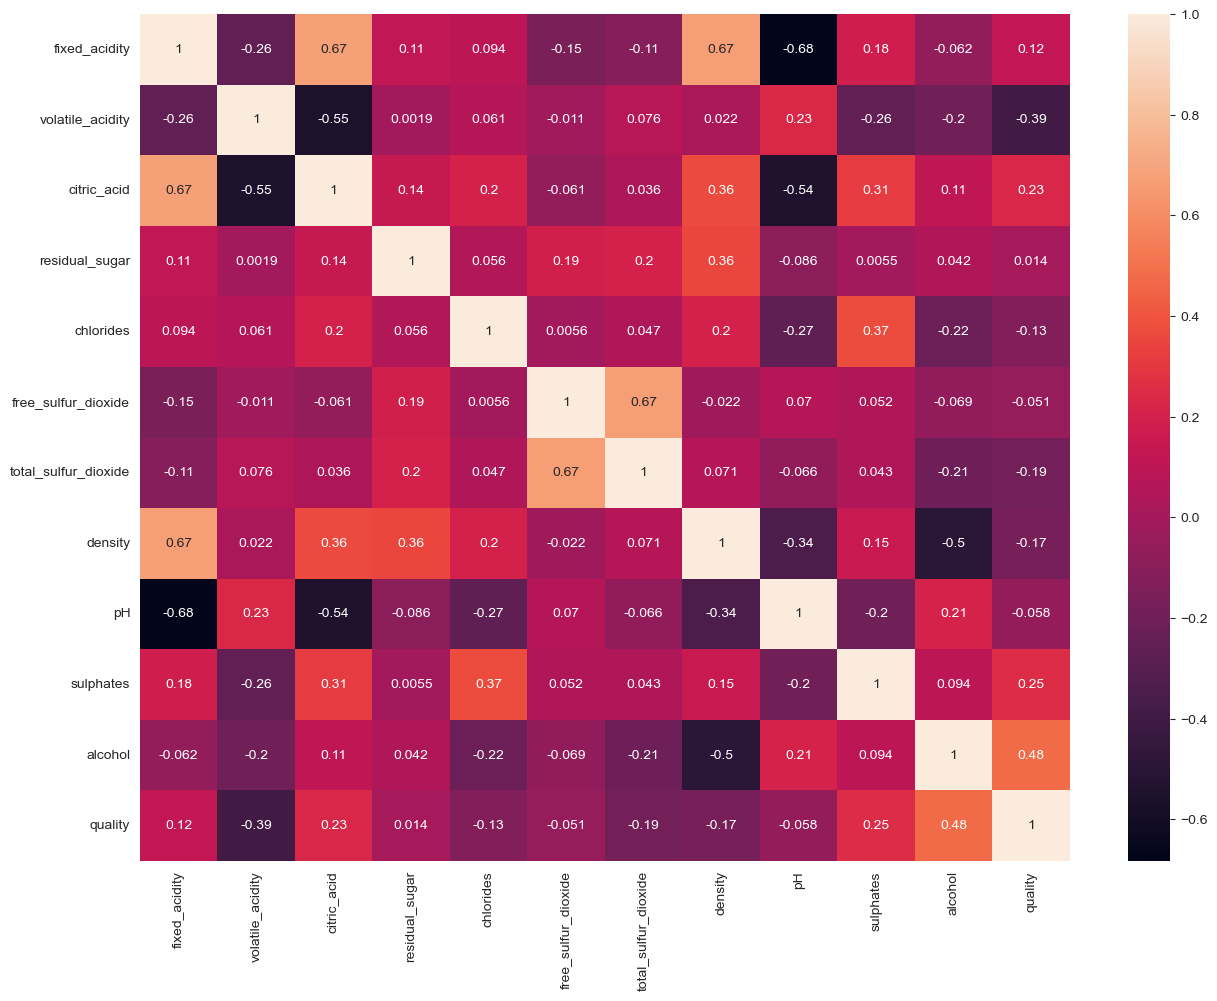

In [3]:
fig, ax = plt.subplots(figsize=(15, 11))
sns.heatmap(wine.corr(), annot=True, ax=ax);

In [4]:
wine.drop(['residual_sugar', 'free_sulfur_dioxide', 'pH'], axis=1, inplace=True)
wine

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


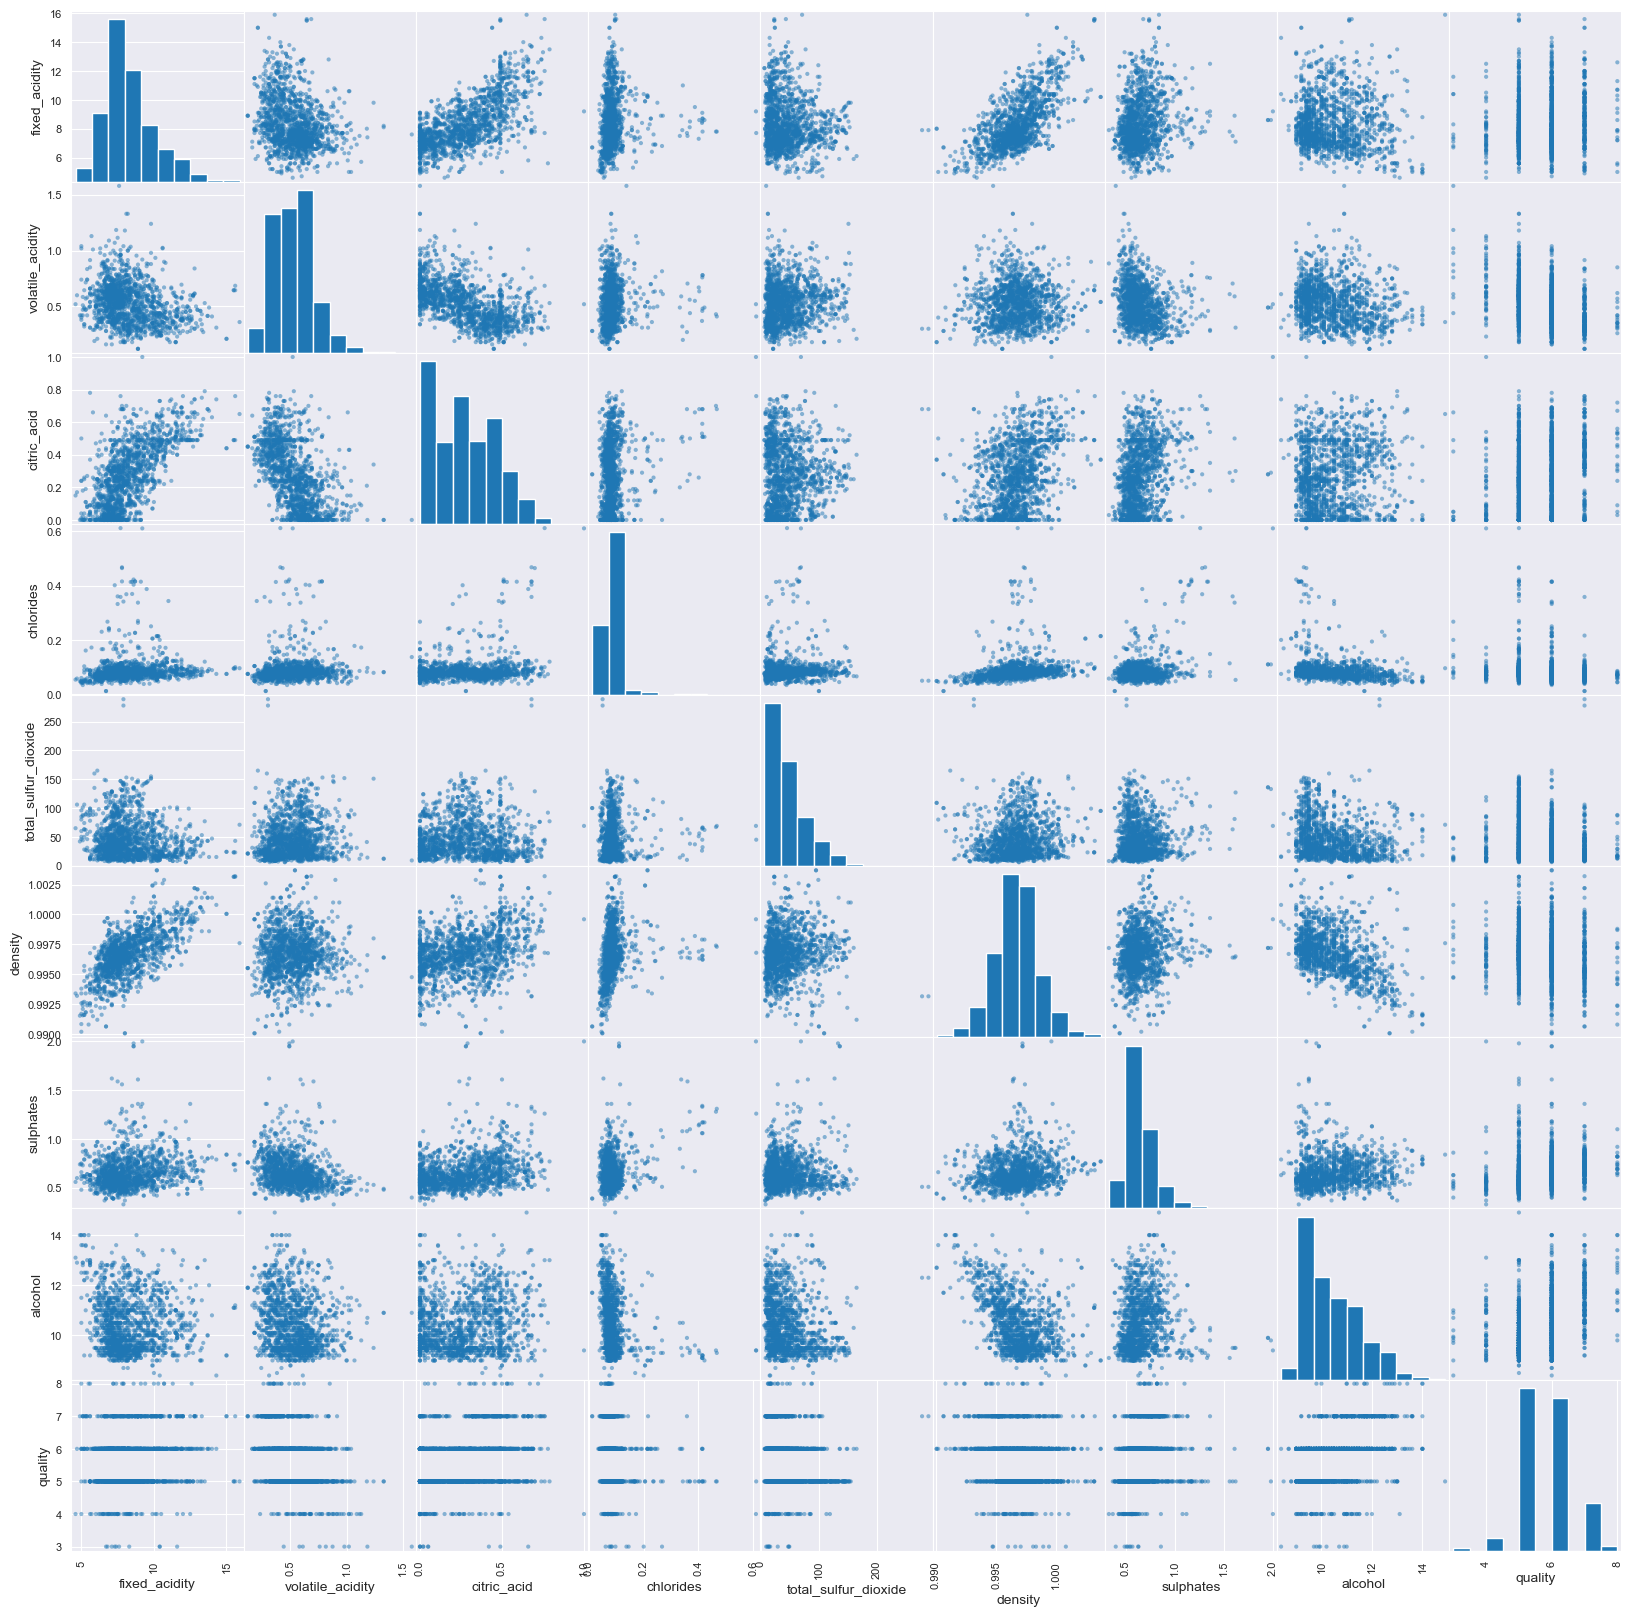

In [5]:
pd.plotting.scatter_matrix(wine, figsize=(20, 20));

In [6]:
X_train, X_test, y_train, y_test = train_test_split(wine.drop('quality', axis=1), wine.quality)

In [7]:
X_train.shape

(1199, 8)

In [8]:
X_test.shape

(400, 8)

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train);

In [10]:
y_pred = linear_model.predict(X_test)

In [11]:
linear_mse = mean_squared_error(y_test, y_pred)
linear_mse

0.37821785616160286

In [12]:
degrees = []
mse_list = []
predictions = []

for degree in range(1, 5):
    polynomial_feautures = PolynomialFeatures(degree=degree)

    X_train_polynomial = polynomial_feautures.fit_transform(X_train)
    X_test_polynomial = polynomial_feautures.transform(X_test)

    polynomial_model = LinearRegression()
    polynomial_model.fit(X_train_polynomial, y_train)

    y_pred_polynomial = polynomial_model.predict(X_test_polynomial)

    mse = mean_squared_error(y_test, y_pred_polynomial)

    degrees.append(degree)
    mse_list.append(mse)
    predictions.append(y_pred_polynomial)

poly_df = pd.DataFrame.from_dict({
    'degree': degrees,
    'mse': mse_list,
    'predictions': predictions
})

poly_df.set_index('degree', inplace=True)
poly_df['linear_mse_difference'] = poly_df.mse - linear_mse
poly_df

,mse,predictions,linear_mse_difference
degree,,,
1,0.378218,"[5.201316820291687, 4.97188406572765, 5.056081...",4.940492e-15
2,0.375853,"[4.910182592126148, 4.987070026452784, 4.97910...",-2.364790e-03
3,0.595764,"[4.527086976915598, 4.931500565260649, 4.64160...",2.175456e-01
4,5.132971,"[4.948936283017247, 5.094371761613729, 4.24686...",4.754753e+00


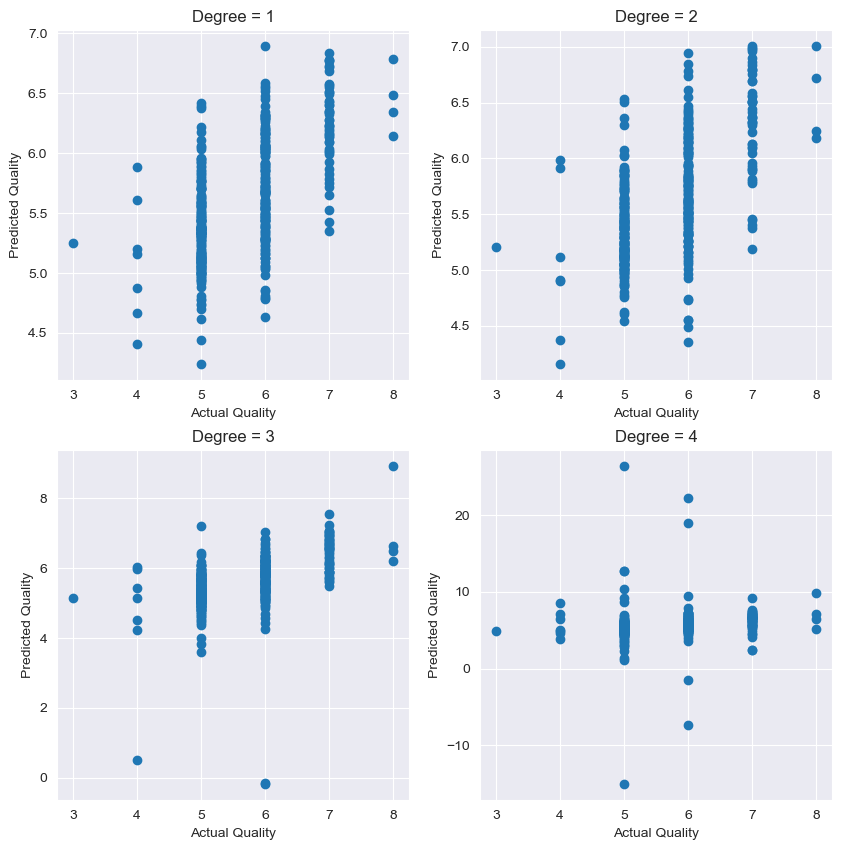

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    axes[i // 2, i % 2].scatter(y_test, poly_df.iloc[i].predictions)
    axes[i // 2, i % 2].set_xlabel('Actual Quality')
    axes[i // 2, i % 2].set_ylabel('Predicted Quality')
    axes[i // 2, i % 2].set_title(f'Degree = {i + 1}')